## 311 Unified Data Analysis
---
### Data Source and API

- AODP Dataset Access: https://data.austintexas.gov/City-Government/311-Unified-Data-Test-Site-2019/i26j-ai4z
- API Endpoint: https://data.austintexas.gov/resource/i26j-ai4z.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/i26j-ai4z

Column Name meaning -
Service Request (SR) Number: The service request tracking number.


### Data Extraction and Munging

In [2]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import seaborn as sns
import pandas as pd
from sodapy import Socrata

In [3]:
client = Socrata("data.austintexas.gov", None)

results = client.get("i26j-ai4z", limit=850000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,:@computed_region_8spj_utxs,:@computed_region_a3it_2a2z,:@computed_region_e9j2_6w3z,:@computed_region_jcrc_4uuy,:@computed_region_m2th_e4b7,:@computed_region_q9nd_rr82,:@computed_region_rxpj_nzrk,sr_closed_date,sr_created_date,sr_department_desc,...,sr_location_x,sr_location_y,sr_location_zip_code,sr_method_received_desc,sr_number,sr_status_date,sr_status_desc,sr_type_code,sr_type_desc,sr_updated_date
0,5,3259,NaN,5,373,1,23,NaN,2020-01-14T18:59:50.000,Transportation,...,3094507.50309130,10045523.00050510,78745,Phone,20-00017358,2020-01-14T18:59:50.000,Open,TRASIGMA,Traffic Signal - Maintenance,2020-01-14T18:59:50.000
1,10,3647,NaN,51,540,5,58,NaN,2020-01-14T18:59:33.000,Animal Services Office,...,3103876.91493064,10128535.80689370,78759,Phone,20-00017356,2020-01-14T18:59:33.000,Open,ACBITE2,Animal Bite,2020-01-14T18:59:33.000
2,5,3259,NaN,5,62,1,23,NaN,2020-01-14T18:57:28.000,Austin Energy Department,...,3088219.25020316,10047135.00069700,78745,Phone,20-00017352,2020-01-14T18:57:28.000,New,STREETL2,Street Light Issue- Address,2020-01-14T18:57:28.000
3,5,3637,NaN,37,373,1,22,NaN,2020-01-14T18:54:50.000,Animal Services Office,...,3094805.50012051,10027325.00068780,78748,Phone,20-00017349,2020-01-14T18:54:50.000,Open,COAACINJ,Injured / Sick Animal,2020-01-14T18:54:50.000
4,4,3641,77,40,217,9,3,NaN,2020-01-14T18:47:34.000,Transportation,...,3121270.82694483,10096222.58944410,78752,Phone,20-00017341,2020-01-14T19:03:12.000,Work In Progress,TRASIGMA,Traffic Signal - Maintenance,2020-01-14T19:03:12.000
5,9,2858,72,26,126,10,69,NaN,2020-01-14T18:46:15.000,Public Works,...,3105542.87407681,10073088.53822750,78703,Phone,20-00017340,2020-01-14T19:00:15.000,Open,OBSTMIDB,Obstruction in ROW,2020-01-14T19:00:15.000
6,6,3639,NaN,39,540,6,28,NaN,2020-01-14T18:44:48.000,Animal Services Office,...,3102221.57069041,10131630.33997110,78750,Phone,20-00017339,2020-01-14T18:44:48.000,Open,COAACINJ,Injured / Sick Animal,2020-01-14T18:55:04.000
7,9,2858,72,26,126,10,69,NaN,2020-01-14T18:41:26.000,Transportation,...,3105542.87407681,10073088.53822750,78703,Phone,20-00017337,2020-01-14T18:41:26.000,Open,SIGNTRA1,Sign - Traffic Sign Maintenance,2020-01-14T18:41:26.000
8,5,2859,93,9,217,1,75,NaN,2020-01-14T18:39:13.000,Transportation,...,3103902.85022954,10068001.62303340,78704,Spot311 Interface,20-00017335,2020-01-14T18:39:13.000,Open,SIGNTRA1,Sign - Traffic Sign Maintenance,2020-01-14T18:39:13.000
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-14T18:33:51.000,Austin Energy Department,...,NaN,NaN,NaN,Phone,20-00017330,2020-01-14T18:33:51.000,New,AESTRPO1,Street Light Issue- Multiple poles/multiple st...,2020-01-14T18:33:51.000


In [3]:
#df = pd.read_csv('Data_Files/311_Unified_Data_Test_Site_2019.csv', low_memory=False)
#df_backup = df

In [4]:
# Data Filtering to only store complaints about Service request type 'DOCKMOBI' which 
# includes SR Descriptions 'Shared Micromobility' and 'Dockless Mobility'.

results_df = results_df[results_df["sr_type_code"]== "DOCKMOBI"]
results_df.head()

,:@computed_region_8spj_utxs,:@computed_region_a3it_2a2z,:@computed_region_e9j2_6w3z,:@computed_region_jcrc_4uuy,:@computed_region_m2th_e4b7,:@computed_region_q9nd_rr82,:@computed_region_rxpj_nzrk,sr_closed_date,sr_created_date,sr_department_desc,...,sr_location_x,sr_location_y,sr_location_zip_code,sr_method_received_desc,sr_number,sr_status_date,sr_status_desc,sr_type_code,sr_type_desc,sr_updated_date
12,9,2856,60,52,217,10,24,NaN,2020-01-14T18:26:41.000,Transportation,...,3114306.65168348,10070732.97990200,78701,Phone,20-00017321,2020-01-14T18:26:41.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T18:26:41.000
62,9,2860,44,43,217,10,50,NaN,2020-01-14T17:03:12.000,Transportation,...,3114123.74877399,10078085.00260500,78705,Spot311 Interface,20-00017184,2020-01-14T17:03:12.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:03:12.000
63,9,2859,42,9,217,10,75,NaN,2020-01-14T17:03:10.000,Transportation,...,3111687.74837113,10066591.00257100,78704,Spot311 Interface,20-00017183,2020-01-14T17:03:10.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:03:10.000
65,9,2859,42,9,217,10,75,NaN,2020-01-14T17:00:09.000,Transportation,...,3111444.49938995,10066147.00025120,78704,Spot311 Interface,20-00017177,2020-01-14T17:00:09.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:00:09.000
145,9,3256,64,8,309,10,55,NaN,2020-01-14T15:15:04.000,Transportation,...,3119404.40237109,10062560.35989420,78741,Spot311 Interface,20-00016974,2020-01-14T15:15:04.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T15:15:04.000


In [5]:
results_df.count()

:@computed_region_8spj_utxs     10025
:@computed_region_a3it_2a2z     10124
:@computed_region_e9j2_6w3z      9705
:@computed_region_jcrc_4uuy     10119
:@computed_region_m2th_e4b7     10071
:@computed_region_q9nd_rr82     10025
:@computed_region_rxpj_nzrk     10124
sr_closed_date                  10052
sr_created_date                 10131
sr_department_desc              10131
sr_location                     10131
sr_location_city                10128
sr_location_council_district    10045
sr_location_county              10120
sr_location_lat                 10131
sr_location_lat_long            10131
sr_location_long                10131
sr_location_map_page            10120
sr_location_map_tile            10119
sr_location_street_name         10131
sr_location_street_number        8985
sr_location_x                   10131
sr_location_y                   10131
sr_location_zip_code            10053
sr_method_received_desc         10131
sr_number                       10131
sr_status_da

In [6]:
# Check how many sub types (SR Type Desc) inclue SR Type Code "DOCKMOBI"
results_df["sr_type_desc"].value_counts()

Dockless Mobility       6454
Shared Micromobility    3677
Name: sr_type_desc, dtype: int64

In [11]:
results_df.count()

sr_number                       10086
sr_type_code                    10086
sr_type_desc                    10086
sr_department_desc              10086
sr_method_received_desc         10086
sr_status_desc                  10086
sr_status_date                  10086
sr_created_date                 10086
sr_updated_date                 10086
sr_location                     10086
sr_location_street_number        8941
sr_location_street_name         10086
sr_location_city                10083
sr_location_zip_code            10008
sr_location_county              10075
sr_location_x                   10086
sr_location_y                   10086
sr_location_lat                 10086
sr_location_long                10086
sr_location_lat_long            10086
sr_location_council_district    10000
sr_location_map_page            10075
sr_location_map_tile            10074
:@computed_region_8spj_utxs      9980
:@computed_region_jcrc_4uuy     10074
:@computed_region_q9nd_rr82      9980
:@computed_r

### Data Cleaning

In [8]:
clean_df = results_df.copy()

In [9]:
# Renaming Column Names
clean_df.columns = clean_df.columns.str.replace('_',' ').str.title().str.replace('Sr','SR')
clean_df

,:@Computed Region 8Spj Utxs,:@Computed Region A3It 2A2Z,:@Computed Region E9J2 6W3Z,:@Computed Region Jcrc 4Uuy,:@Computed Region M2Th E4B7,:@Computed Region Q9Nd Rr82,:@Computed Region Rxpj Nzrk,SR Closed Date,SR Created Date,SR Department Desc,...,SR Location X,SR Location Y,SR Location Zip Code,SR Method Received Desc,SR Number,SR Status Date,SR Status Desc,SR Type Code,SR Type Desc,SR Updated Date
12,9,2856,60,52,217,10,24,NaN,2020-01-14T18:26:41.000,Transportation,...,3114306.65168348,10070732.97990200,78701,Phone,20-00017321,2020-01-14T18:26:41.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T18:26:41.000
62,9,2860,44,43,217,10,50,NaN,2020-01-14T17:03:12.000,Transportation,...,3114123.74877399,10078085.00260500,78705,Spot311 Interface,20-00017184,2020-01-14T17:03:12.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:03:12.000
63,9,2859,42,9,217,10,75,NaN,2020-01-14T17:03:10.000,Transportation,...,3111687.74837113,10066591.00257100,78704,Spot311 Interface,20-00017183,2020-01-14T17:03:10.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:03:10.000
65,9,2859,42,9,217,10,75,NaN,2020-01-14T17:00:09.000,Transportation,...,3111444.49938995,10066147.00025120,78704,Spot311 Interface,20-00017177,2020-01-14T17:00:09.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T17:00:09.000
145,9,3256,64,8,309,10,55,NaN,2020-01-14T15:15:04.000,Transportation,...,3119404.40237109,10062560.35989420,78741,Spot311 Interface,20-00016974,2020-01-14T15:15:04.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T15:15:04.000
157,3,3256,NaN,8,248,3,55,NaN,2020-01-14T14:57:16.000,Transportation,...,3123627.32667599,10063851.84244720,78741,Spot311 Interface,20-00016933,2020-01-14T14:57:16.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T14:57:16.000
237,5,2859,2,9,217,1,75,NaN,2020-01-14T13:26:45.000,Transportation,...,3107414.90614253,10064801.92852110,78704,Phone,20-00016728,2020-01-14T13:26:45.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T13:26:45.000
256,9,2856,60,52,217,10,24,NaN,2020-01-14T13:01:51.000,Transportation,...,3111235.99713993,10070033.00282740,78701,Phone,20-00016683,2020-01-14T13:01:51.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T13:01:51.000
355,9,2856,60,52,217,10,24,NaN,2020-01-14T10:50:56.000,Transportation,...,3115202.77142072,10070820.73074320,78701,Spot311 Interface,20-00016424,2020-01-14T10:50:56.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T10:50:56.000
358,9,2856,60,52,217,10,24,NaN,2020-01-14T10:47:54.000,Transportation,...,3115342.80777469,10071090.39036340,78701,Spot311 Interface,20-00016419,2020-01-14T10:47:54.000,Open,DOCKMOBI,Shared Micromobility,2020-01-14T10:47:54.000


In [10]:
clean_df.count()

:@Computed Region 8Spj Utxs     10025
:@Computed Region A3It 2A2Z     10124
:@Computed Region E9J2 6W3Z      9705
:@Computed Region Jcrc 4Uuy     10119
:@Computed Region M2Th E4B7     10071
:@Computed Region Q9Nd Rr82     10025
:@Computed Region Rxpj Nzrk     10124
SR Closed Date                  10052
SR Created Date                 10131
SR Department Desc              10131
SR Location                     10131
SR Location City                10128
SR Location Council District    10045
SR Location County              10120
SR Location Lat                 10131
SR Location Lat Long            10131
SR Location Long                10131
SR Location Map Page            10120
SR Location Map Tile            10119
SR Location Street Name         10131
SR Location Street Number        8985
SR Location X                   10131
SR Location Y                   10131
SR Location Zip Code            10053
SR Method Received Desc         10131
SR Number                       10131
SR Status Da

In [26]:
# Delete unwanted columns:
clean_df = clean_df[clean_df.columns[~clean_df.columns.str.contains(':@Computed Region')]]
list(clean_df.columns)

['SR Number',
 'SR Type Code',
 'SR Type Desc',
 'SR Department Desc',
 'SR Method Received Desc',
 'SR Status Desc',
 'SR Status Date',
 'SR Created Date',
 'SR Updated Date',
 'SR Location',
 'SR Location Street Number',
 'SR Location Street Name',
 'SR Location City',
 'SR Location Zip Code',
 'SR Location County',
 'SR Location X',
 'SR Location Y',
 'SR Location Lat',
 'SR Location Long',
 'SR Location Lat Long',
 'SR Location Council District',
 'SR Location Map Page',
 'SR Location Map Tile',
 'SR Closed Date']

In [27]:
# Dropping all the null value rows:
clean_df = clean_df.dropna(how='any')
clean_df.head()

,SR Number,SR Type Code,SR Type Desc,SR Department Desc,SR Method Received Desc,SR Status Desc,SR Status Date,SR Created Date,SR Updated Date,SR Location,...,SR Location County,SR Location X,SR Location Y,SR Location Lat,SR Location Long,SR Location Lat Long,SR Location Council District,SR Location Map Page,SR Location Map Tile,SR Closed Date
160,20-00013084,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T13:45:35.000,2020-01-11T12:42:11.000,2020-01-11T13:45:35.000,"2511 PEARL ST, AUSTIN, TX 78705",...,TRAVIS,3112953.75920598,10078781.93615310,30.29022193,-97.74651975,"{'latitude': '30.29022193', 'longitude': '-97....",9,585E,MJ24,2020-01-11T13:45:35.000
293,20-00012691,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T09:53:05.000,2020-01-10T21:56:11.000,2020-01-11T09:53:05.000,"4001 GUADALUPE ST, AUSTIN, TX 78751",...,TRAVIS,3116137.24766586,10084396.00219220,30.30545021,-97.73602069,"{'latitude': '30.30545021', 'longitude': '-97....",9,555T,MJ25,2020-01-11T09:53:05.000
393,20-00012386,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T09:58:46.000,2020-01-10T16:08:38.000,2020-01-11T09:58:46.000,"3313 KINGS LN, AUSTIN, TX 78705",...,TRAVIS,3114306.76800564,10082836.71257000,30.30128133,-97.7419348,"{'latitude': '30.30128133', 'longitude': '-97....",9,555W,MJ25,2020-01-11T09:58:46.000
759,20-00011403,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T10:03:28.000,2020-01-09T23:14:43.000,2020-01-11T10:03:28.000,"1705 S CONGRESS AVE, AUSTIN, TX 78704",...,TRAVIS,3112036.08368211,10063022.81118240,30.24696112,-97.75058569,"{'latitude': '30.24696112', 'longitude': '-97....",9,614M,MH20,2020-01-11T10:03:28.000
828,20-00011129,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2020-01-09T18:15:05.000,2020-01-09T17:07:28.000,2020-01-09T18:15:05.000,"71 TRINITY ST, AUSTIN, TX 78701",...,TRAVIS,3114819.90113705,10068326.94678290,30.26136334,-97.74138045,"{'latitude': '30.26136334', 'longitude': '-97....",9,615A,MJ21,2020-01-09T18:15:05.000


In [28]:
# Check how many null value got deleted
clean_df.count()

SR Number                       8720
SR Type Code                    8720
SR Type Desc                    8720
SR Department Desc              8720
SR Method Received Desc         8720
SR Status Desc                  8720
SR Status Date                  8720
SR Created Date                 8720
SR Updated Date                 8720
SR Location                     8720
SR Location Street Number       8720
SR Location Street Name         8720
SR Location City                8720
SR Location Zip Code            8720
SR Location County              8720
SR Location X                   8720
SR Location Y                   8720
SR Location Lat                 8720
SR Location Long                8720
SR Location Lat Long            8720
SR Location Council District    8720
SR Location Map Page            8720
SR Location Map Tile            8720
SR Closed Date                  8720
dtype: int64

Count after clean-up:

Looks like there were roughly ~130 rows with some NaN values for most columns deleted. 

In [29]:
# df for only the Shared micromobility Type Desc Complaints
shared_mobility_calls = clean_df[clean_df["SR Type Desc"] == "Shared Micromobility"]
shared_mobility_calls

,SR Number,SR Type Code,SR Type Desc,SR Department Desc,SR Method Received Desc,SR Status Desc,SR Status Date,SR Created Date,SR Updated Date,SR Location,...,SR Location County,SR Location X,SR Location Y,SR Location Lat,SR Location Long,SR Location Lat Long,SR Location Council District,SR Location Map Page,SR Location Map Tile,SR Closed Date
160,20-00013084,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T13:45:35.000,2020-01-11T12:42:11.000,2020-01-11T13:45:35.000,"2511 PEARL ST, AUSTIN, TX 78705",...,TRAVIS,3112953.75920598,10078781.93615310,30.29022193,-97.74651975,"{'latitude': '30.29022193', 'longitude': '-97....",9,585E,MJ24,2020-01-11T13:45:35.000
293,20-00012691,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T09:53:05.000,2020-01-10T21:56:11.000,2020-01-11T09:53:05.000,"4001 GUADALUPE ST, AUSTIN, TX 78751",...,TRAVIS,3116137.24766586,10084396.00219220,30.30545021,-97.73602069,"{'latitude': '30.30545021', 'longitude': '-97....",9,555T,MJ25,2020-01-11T09:53:05.000
393,20-00012386,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T09:58:46.000,2020-01-10T16:08:38.000,2020-01-11T09:58:46.000,"3313 KINGS LN, AUSTIN, TX 78705",...,TRAVIS,3114306.76800564,10082836.71257000,30.30128133,-97.7419348,"{'latitude': '30.30128133', 'longitude': '-97....",9,555W,MJ25,2020-01-11T09:58:46.000
759,20-00011403,DOCKMOBI,Shared Micromobility,Transportation,Phone,Closed,2020-01-11T10:03:28.000,2020-01-09T23:14:43.000,2020-01-11T10:03:28.000,"1705 S CONGRESS AVE, AUSTIN, TX 78704",...,TRAVIS,3112036.08368211,10063022.81118240,30.24696112,-97.75058569,"{'latitude': '30.24696112', 'longitude': '-97....",9,614M,MH20,2020-01-11T10:03:28.000
828,20-00011129,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2020-01-09T18:15:05.000,2020-01-09T17:07:28.000,2020-01-09T18:15:05.000,"71 TRINITY ST, AUSTIN, TX 78701",...,TRAVIS,3114819.90113705,10068326.94678290,30.26136334,-97.74138045,"{'latitude': '30.26136334', 'longitude': '-97....",9,615A,MJ21,2020-01-09T18:15:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80583,19-00281614,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2019-08-02T13:09:49.000,2019-07-24T20:23:08.000,2019-08-02T13:09:49.000,"115 SANDRA MURAIDA WAY, AUSTIN, TX 78703",...,TRAVIS,3110484.93366245,10070478.857265,30.26755559,-97.75494956,"{'latitude': '30.26755559', 'longitude': '-97....",9,584Z,MH22,2019-08-02T13:09:49.000
80634,19-00281506,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2019-07-31T09:45:28.000,2019-07-24T18:55:41.000,2019-07-31T09:45:28.000,"82 RAINEY ST, AUSTIN, TX 78701",...,TRAVIS,3115731.7473688,10067722.1322451,30.25964236,-97.7385377,"{'latitude': '30.25964236', 'longitude': '-97....",9,615B,MJ21,2019-07-31T09:45:28.000
80955,19-00280629,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2019-07-31T09:08:40.000,2019-07-24T10:18:53.000,2019-07-31T09:08:40.000,"404 W 26TH ST, AUSTIN, TX 78705",...,TRAVIS,3114522.92588404,10078930.902609,30.290531,-97.74153837,"{'latitude': '30.290531', 'longitude': '-97.74...",9,585E,MJ24,2019-07-31T09:08:40.000
80994,19-00280569,DOCKMOBI,Shared Micromobility,Transportation,Spot311 Interface,Closed,2019-07-31T09:10:05.000,2019-07-24T09:57:56.000,2019-07-31T09:10:05.000,"514 W 24TH ST, AUSTIN, TX 78705",...,TRAVIS,3114075.47189998,10077983.913823,30.28795653,-97.74302556,"{'latitude': '30.28795653', 'longitude': '-97....",9,585E,MJ24,2019-07-31T09:10:05.000


In [30]:
# df for only the Dockless mobility Type Desc Complaints
dockless_mobility_calls = clean_df[clean_df["SR Type Desc"] == "Dockless Mobility"]
dockless_mobility_calls

,SR Number,SR Type Code,SR Type Desc,SR Department Desc,SR Method Received Desc,SR Status Desc,SR Status Date,SR Created Date,SR Updated Date,SR Location,...,SR Location County,SR Location X,SR Location Y,SR Location Lat,SR Location Long,SR Location Lat Long,SR Location Council District,SR Location Map Page,SR Location Map Tile,SR Closed Date
77765,19-00288899,DOCKMOBI,Dockless Mobility,Transportation,Spot311 Interface,Closed,2019-07-30T14:03:48.000,2019-07-30T12:58:38.000,2019-07-30T14:03:48.000,"100 E 11TH ST, AUSTIN, TX 78701",...,TRAVIS,3114817.14974599,10072486.282712,30.27279688,-97.74108219,"{'latitude': '30.27279688', 'longitude': '-97....",1,585S,MJ22,2019-07-30T14:03:48.000
77783,19-00288862,DOCKMOBI,Dockless Mobility,Transportation,Phone,Closed,2019-07-30T14:02:26.000,2019-07-30T12:30:41.000,2019-07-30T14:02:26.000,"210 E 32ND ST, AUSTIN, TX 78705",...,TRAVIS,3116571.49903776,10080928.0004494,30.29588933,-97.73490165,"{'latitude': '30.29588933', 'longitude': '-97....",9,585B,MJ24,2019-07-30T14:02:26.000
77836,19-00288750,DOCKMOBI,Dockless Mobility,Transportation,Spot311 Interface,Closed,2019-07-30T12:12:55.000,2019-07-30T11:22:32.000,2019-07-30T12:12:55.000,"2002 S CONGRESS AVE, AUSTIN, TX 78704",...,TRAVIS,3111696.16883165,10061994.2417146,30.24415543,-97.75173749,"{'latitude': '30.24415543', 'longitude': '-97....",9,614R,MH20,2019-07-30T12:12:55.000
77942,19-00288519,DOCKMOBI,Dockless Mobility,Transportation,Spot311 Interface,Closed,2019-07-30T11:08:30.000,2019-07-30T09:46:21.000,2019-07-30T11:08:30.000,"7005 SHOAL CREEK BLVD, AUSTIN, TX 78757",...,TRAVIS,3113573.99770608,10100448.9982312,30.34974186,-97.74295668,"{'latitude': '30.34974186', 'longitude': '-97....",7,525N,MJ29,2019-07-30T11:08:30.000
77967,19-00288458,DOCKMOBI,Dockless Mobility,Transportation,Spot311 Interface,Closed,2019-07-30T11:04:37.000,2019-07-30T09:10:19.000,2019-07-30T11:04:37.000,"716 CONGRESS AVE, AUSTIN, TX 78701",...,TRAVIS,3114394.2485623,10071339.0020535,30.26967027,-97.74250614,"{'latitude': '30.26967027', 'longitude': '-97....",9,585S,MJ22,2019-07-30T11:04:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258835,18-00220040,DOCKMOBI,Dockless Mobility,Transportation,Phone,Closed,2018-09-26T14:42:44.000,2018-07-10T09:05:35.000,2018-09-26T14:42:44.000,"122 FREDERICK ST, AUSTIN, TX 78704",...,TRAVIS,3108991.74713961,10057136.0007393,30.23097313,-97.76065557,"{'latitude': '30.23097313', 'longitude': '-97....",3,614Z,MH19,2018-09-26T14:42:44.000
260456,18-00215309,DOCKMOBI,Dockless Mobility,Transportation,Phone,Closed,2018-09-26T14:46:37.000,2018-07-06T11:42:03.000,2018-09-26T14:46:37.000,"901 CHICON ST, AUSTIN, TX 78702",...,TRAVIS,3121195.25,10069591,30.26442801,-97.72109845,"{'latitude': '30.26442801', 'longitude': '-97....",1,585Y,MK22,2018-09-26T14:46:37.000
260742,18-00214399,DOCKMOBI,Dockless Mobility,Transportation,Phone,Closed,2018-09-26T14:50:43.000,2018-07-05T18:11:22.000,2018-09-26T14:50:43.000,"1609 ENFIELD RD, AUSTIN, TX 78703",...,TRAVIS,3109102.24901859,10075988.0002395,30.28278746,-97.75892441,"{'latitude': '30.28278746', 'longitude': '-97....",9,584M,MH23,2018-09-26T14:50:43.000
261442,18-00211272,DOCKMOBI,Dockless Mobility,Transportation,Phone,Closed,2019-01-09T10:09:41.000,2018-07-04T11:21:35.000,2019-01-09T10:09:41.000,"1172 WALLER ST, AUSTIN, TX 78702",...,TRAVIS,3118851.27746993,10071756.9384632,30.27053294,-97.72836041,"{'latitude': '30.27053294', 'longitude': '-97....",1,585U,MK22,2019-01-09T10:09:41.000


In [31]:
zipcodes = clean_df["SR Location Zip Code"].value_counts()
zipcodes

78701    3126
78704    1992
78703     685
78705     626
78702     614
78746     478
78741     286
78723     134
78756     133
78751     132
78757      87
78754      55
78745      54
78712      45
78758      41
78722      41
78731      35
78752      33
78753      23
78721      20
78744      13
78748      13
78759       9
78747       8
78724       8
78749       6
78717       5
78727       5
78726       2
78725       2
78617       2
78735       2
78736       1
78750       1
78739       1
78719       1
78728       1
Name: SR Location Zip Code, dtype: int64

In [ ]:
#something to test

In [1]:
# Convert dataframe to CSV 
output_data_file = "/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/311data.csv"
clean_df.to_csv(output_data_file)

NameError: name 'clean_df' is not defined

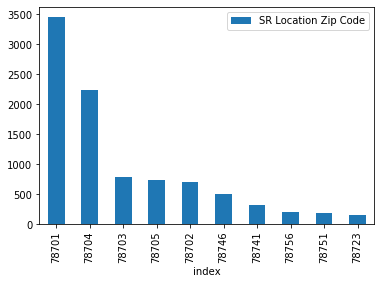

In [17]:
#x = clean_df["SR Location Zip Code"]
zips = clean_df["SR Location Zip Code"].value_counts().head(10)

zips.reset_index().plot(kind='bar', x='index', y='SR Location Zip Code')
